In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('Height-Weight.xlsx')

In [4]:
df.head()

,Weight,Height
0,40,152
1,42,150
2,35,146
3,45,156
4,50,155


# steps for model training for cleaned dataset
 1. depedent and indepedent feature
 2. train test split
 3. standerlization
 4. model training
 5. prediction

In [5]:
X = df[['Weight']]
y = df['Height']

In [6]:
X.shape,y.shape

((24, 1), (24,))

In [7]:
# train test split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape,X_test.shape

((19, 1), (5, 1))

In [10]:
# standerlization
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[ 2.33065964],
       [-0.76049121],
       [-1.11992736],
       [-0.68860398],
       [-0.40105507],
       [-1.62313796],
       [-0.83237844],
       [ 0.03026831],
       [-0.90426567],
       [-0.54482953],
       [ 0.60536614],
       [ 1.2523512 ],
       [-0.32916784],
       [ 1.32423843],
       [-0.11350615],
       [ 1.46801289],
       [ 0.10215554],
       [ 0.67725337],
       [-0.4729423 ]])

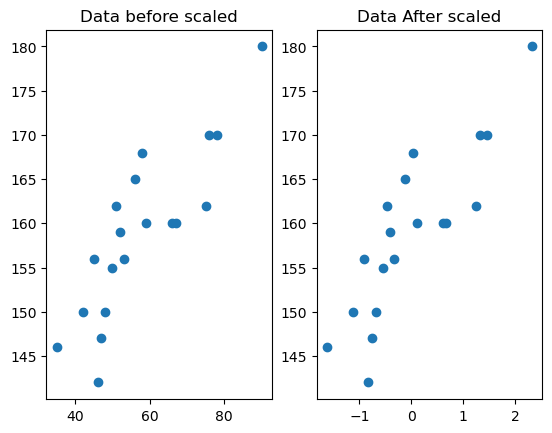

In [14]:
# ploting data
plt.subplot(1,2,1)
plt.scatter(X_train,y_train)
plt.title("Data before scaled")


plt.subplot(1,2,2)
plt.scatter(X_train_scaled,y_train)
plt.title("Data After scaled")
plt.show()

In [15]:
# model  training 
from sklearn.linear_model import LinearRegression


In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [18]:
y_pred = regression.predict(X_test_scaled)

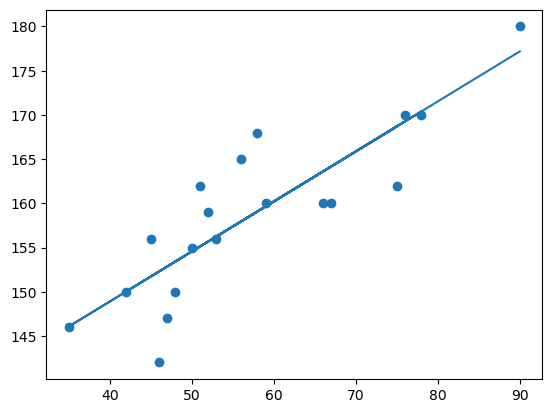

In [19]:
# ploting prediction data tarining 
plt.plot(X_train,regression.predict(X_train_scaled))
plt.scatter(X_train,y_train)
plt.show()

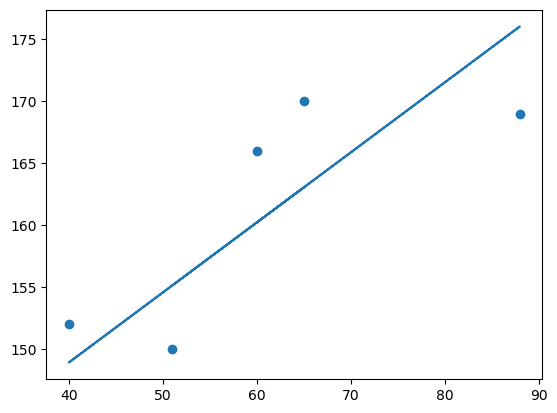

In [20]:
# ploting prediction for testing data
plt.plot(X_test,y_pred)
plt.scatter(X_test,y_test)
plt.show()

## claculating MSE,MAE,RMSE,R2_sore

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [23]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

33.49890603427259
5.604191479615213
5.787823946378517


In [24]:
# calculate score
score = r2_score(y_test,y_pred)
score

0.5487755113918023

## making prediction 

In [26]:
weight_scaled = scaler.transform([[80]])
weight_scaled

C:\Users\Yash sakhareliya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.61178735]])

In [28]:
cal_height = regression.predict(weight_scaled)

In [30]:
cal_height[0]

171.52487975263398

## Assumption

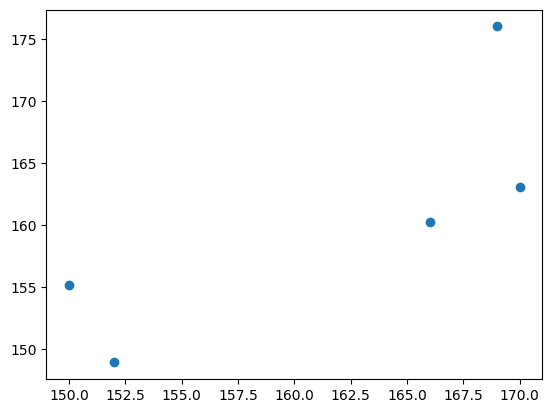

In [32]:
# plot test data and thair prediction
# if plot is linear so model is good
plt.scatter(y_test,y_pred)
plt.show()

In [39]:
# ploting residual 
# if it is normaly diatributed so model is good
residual = y_test-y_pred
residual

8     5.788393
16    6.960075
0     3.101666
18   -7.050189
11   -5.120634
Name: Height, dtype: float64

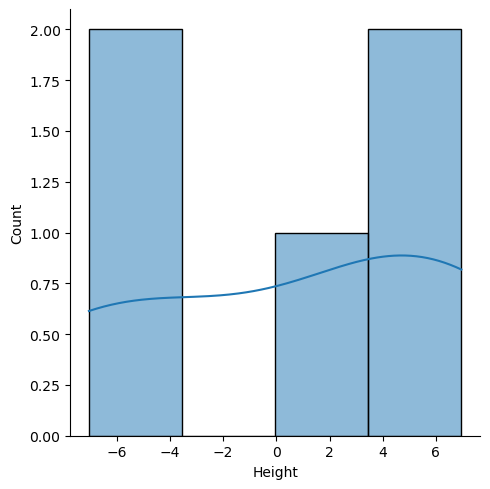

In [36]:
import seaborn as sns
sns.displot(residual,kde=True)
plt.show()

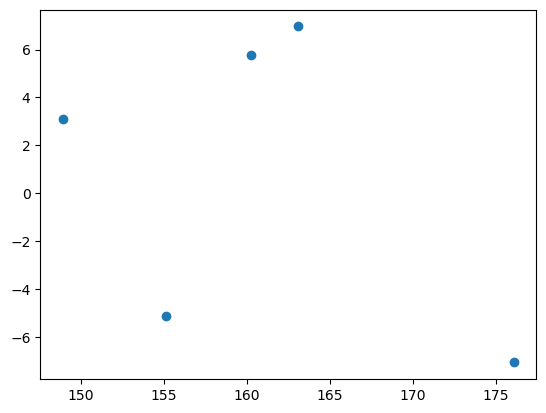

In [38]:
# plot residual and prediction
# if thai is uniform diatributed so model is good
plt.scatter(y_pred,residual)
plt.show()